<a href="https://colab.research.google.com/github/racc00n-ann/Innopolis/blob/main/Final_Project_Text_Analysis_of_Russian_Classics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ классической литературы

Дла работы будем использовать файлы из репозитория: https://github.com/nevmenandr/word2vec-russian-novels/tree/master/books_before

В этом проекте предстоит провести анализ текстов классической литературы.

**Цель проекта** — исследовать лексический состав, частоту употребления слов,
тематические модели и другие аспекты текста, которые помогут лучше понять стиль и содержание произведений.

Задачи проекта:
1. Сбор данных
2. Предобработка текста
3. Анализ текста
4. Анализ лексического разнообразия
5. Анализ эмоциональной окраски текста
6. Интерпретация результатов

# 1. Сбор данных:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/MyDrive/ДЗ/'

files = os.listdir(folder_path)

all_texts = {}

for file_name in files:
    if file_name.endswith('_JOF.txt'):
        with open(folder_path + file_name, 'r', encoding='utf-8') as file:
            text = file.read()
        all_texts[file_name] = text

for file_name, text in all_texts.items():
    print(f"Текст из файла {file_name}:")
    print(text[:35])
    print("="*50 + "\n")




Текст из файла CrimeAndPunishment_JOF.txt:
ПРЕСТУПЛЕНИЕ И НАКАЗАНИЕ
РОМАН 
В Ш

Текст из файла EugeneOnegin_JOF.txt:
ЕВГЕНИЙ ОНЕГИН
РОМАН В СТИХАХ

Не м

Текст из файла FathersAndSons_JOF.txt:
ОТЦЫ И ДЕТИ

Посвящается памяти
Вис

Текст из файла MasterAndMargarita_JOF.txt:
МИХАИЛ БУЛГАКОВ

МАСТЕР И МАРГАРИТА

Текст из файла WarAndPeace_JOF.txt:


  Л. Н. Толстой «Война и мир»
  




# 2. Предобработка текста:

Очистим текст от пунктуации, приведем слова к нижнему
регистру, выполним лемматизацию.
Разделим текст на предложения и слова, удалим стоп-
слова.

In [ ]:
!pip install -q pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 61.5 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import pymorphy3
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('russian')) | set(punctuation)
morph = pymorphy3.MorphAnalyzer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яё\s]', '', text)
    sentences = sent_tokenize(text, language='russian')

    processed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        cleaned_words = []

        for word in words:
            if word in stop_words or len(word) <= 2:
                continue

            parsed = morph.parse(word)[0]
            lemma = parsed.normal_form

            if parsed.tag.POS in {'NOUN', 'VERB', 'ADJ', 'ADV'}:
                cleaned_words.append(lemma)

        processed_sentences.append(cleaned_words)

    return processed_sentences

processed_texts = {}

for file_name, text in all_texts.items():
    processed = preprocess_text(text)
    processed_texts[file_name] = processed
    print(f"Первые 50 слов ({file_name}):")
    print([word for sent in processed for word in sent][:50])
    print("=" * 100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Первые 50 слов (CrimeAndPunishment_JOF.txt):
['преступление', 'наказание', 'роман', 'часть', 'эпилог', 'часть', 'начало', 'июль', 'жаркое', 'время', 'вечер', 'человек', 'выйти', 'каморка', 'нанимать', 'жилец', 'переулок', 'улица', 'нерешимость', 'отправиться', 'мост', 'избегнуть', 'встреча', 'хозяйка', 'лестница', 'каморка', 'приходиться', 'кровля', 'дом', 'походить', 'шкаф', 'квартира', 'хозяйка', 'нанимать', 'каморка', 'обед', 'прислуга', 'помещаться', 'лестница', 'квартира', 'выход', 'улица', 'кухня', 'лестница', 'человек', 'чувствовать', 'ощущение', 'стыдиться', 'морщиться', 'хозяйка']
Первые 50 слов (EugeneOnegin_JOF.txt):
['евгений', 'онегин', 'роман', 'стих', 'свет', 'внимание', 'дружба', 'хотеть', 'залог', 'душа', 'мечта', 'поэзия', 'дума', 'простота', 'рука', 'принять', 'собрание', 'глава', 'плод', 'забава', 'бессонница', 'вдохновение', 'год', 'ум', 'наблюдение', 'сердце', 'замета', 'глава', 'торопиться', 'спешить', 'дядя', 'правило', 'шутка', 'занемочь', 'заставить', 'мочь', 

# 3. Анализ текста:

Определим частотность слов, построим облако слов для
визуализации.

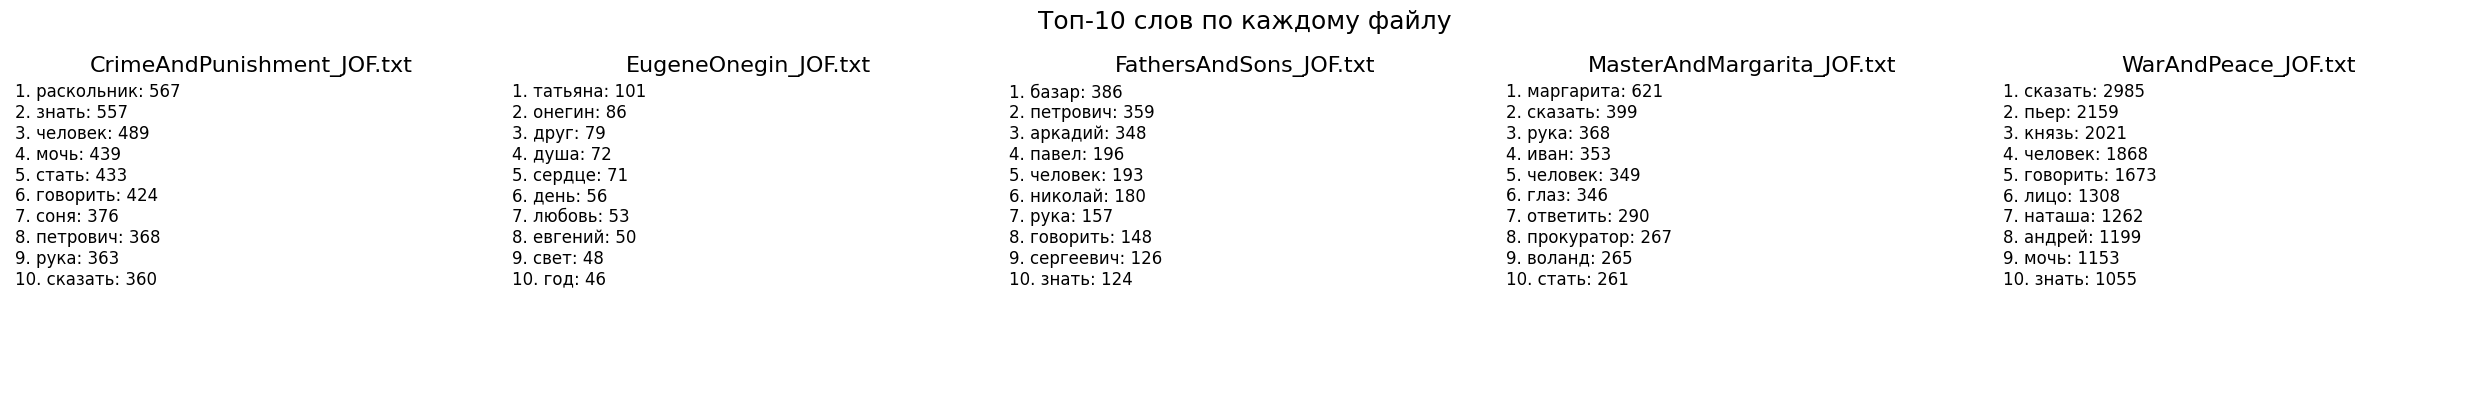

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

fig, axes = plt.subplots(1, 5, figsize=(25, 4))

fig.suptitle("Топ-10 слов по каждому файлу", fontsize=18)


for i, (file_name, text_data) in enumerate(processed_texts.items()):
    all_words = []
    for sentence in text_data:
        all_words.extend(sentence)

    word_counts = Counter(all_words)
    top_10_words = word_counts.most_common(10)

    lines = []
    for position, (word, count) in enumerate(top_10_words, 1):
        lines.append(f"{position}. {word}: {count}")

    text_to_display = "\n".join(lines)

    axes[i].set_title(file_name, fontsize=16)
    axes[i].text( 0.01, 0.99, text_to_display, fontsize=12, ha='left', va='top')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

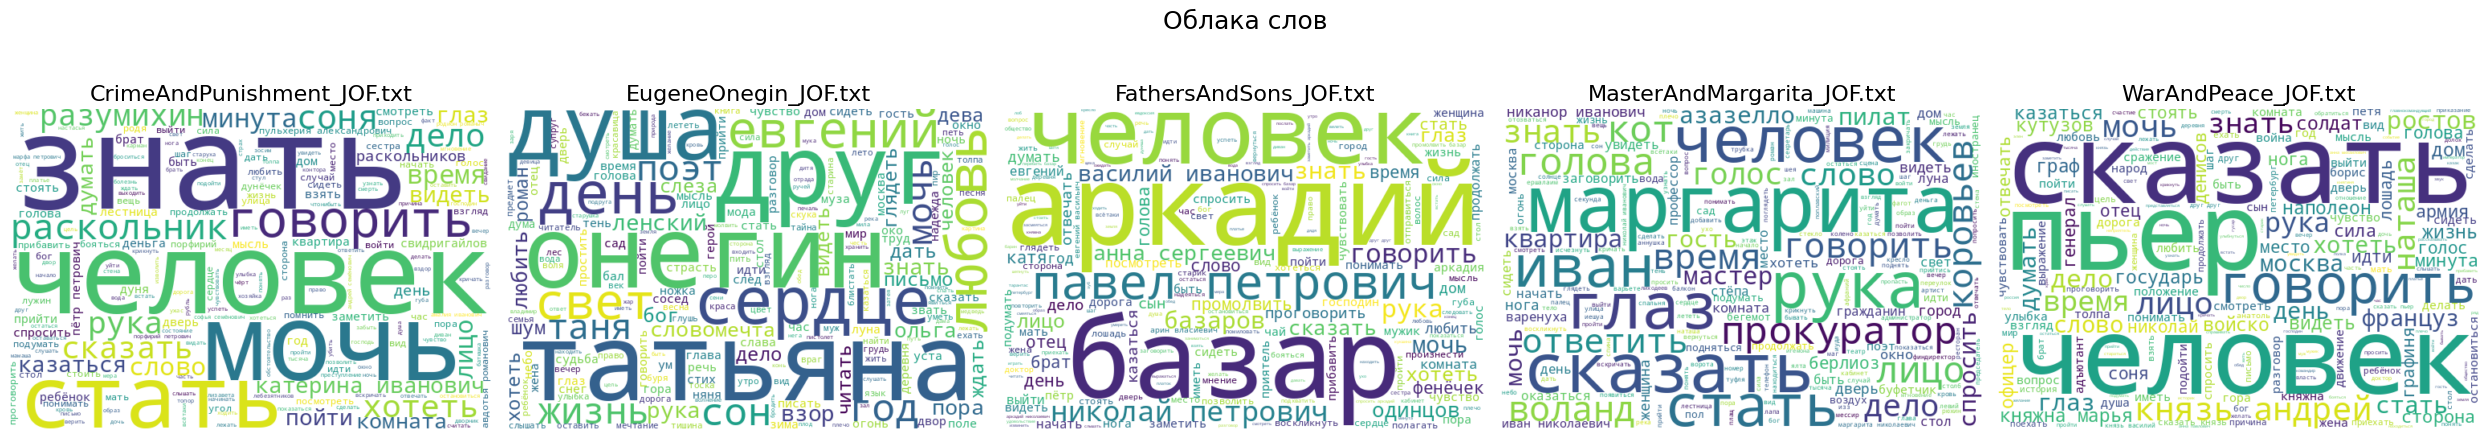

In [ ]:
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

fig.suptitle("Облака слов", fontsize=18)

for i, (file_name, text_data) in enumerate(processed_texts.items()):
    all_words = []
    for sentence in text_data:
        all_words.extend(sentence)

    text_for_wordcloud = ' '.join(all_words)

    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(' '.join(all_words))

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(file_name, fontsize=16)

plt.tight_layout()
plt.show()

# 4. Анализ лексического разнообразия:

Посчитаем среднюю длину предложений и другие статистические показатели.


In [ ]:
from collections import Counter

def analyze_text_stats(original_text, processed_text):
    sentences = sent_tokenize(original_text, language='russian')
    words_in_sentences = [len(word_tokenize(sent)) for sent in sentences]

    num_sentences = len(sentences)
    avg_sentence_length = sum(words_in_sentences) / num_sentences if num_sentences > 0 else 0

    all_words = [word for sent in processed_text for word in sent]
    num_words = len(all_words)
    num_unique_words = len(set(all_words))

    lexical_diversity = num_unique_words / num_words if num_words > 0 else 0
    avg_word_length = sum(len(word) for word in all_words) / num_words if num_words > 0 else 0

    return num_sentences, avg_sentence_length, num_words, num_unique_words, lexical_diversity, avg_word_length


for file_name in all_texts:
    original_text = all_texts[file_name]
    processed_text = processed_texts[file_name]

    num_sentences, avg_sentence_length, num_words, num_unique_words, lexical_diversity, avg_word_length = analyze_text_stats(original_text, processed_text)

    print(f"Анализ лексического разнообразия для файла {file_name}:")
    print(f"- Количество предложений: {num_sentences}")
    print(f"- Средняя длина предложения (в словах): {avg_sentence_length:.2f}")
    print(f"- Общее количество слов: {num_words}")
    print(f"- Уникальных слов: {num_unique_words}")
    print(f"- Лексическое разнообразие: {lexical_diversity:.3f}")
    print(f"- Средняя длина слова: {avg_word_length:.2f}")
    print("-" * 70)


Анализ лексического разнообразия для файла CrimeAndPunishment_JOF.txt:
- Количество предложений: 13525
- Средняя длина предложения (в словах): 16.36
- Общее количество слов: 55031
- Уникальных слов: 7678
- Лексическое разнообразие: 0.140
- Средняя длина слова: 6.99
----------------------------------------------------------------------
Анализ лексического разнообразия для файла EugeneOnegin_JOF.txt:
- Количество предложений: 2049
- Средняя длина предложения (в словах): 14.53
- Общее количество слов: 9256
- Уникальных слов: 3164
- Лексическое разнообразие: 0.342
- Средняя длина слова: 6.05
----------------------------------------------------------------------
Анализ лексического разнообразия для файла FathersAndSons_JOF.txt:
- Количество предложений: 4358
- Средняя длина предложения (в словах): 16.27
- Общее количество слов: 20274
- Уникальных слов: 4563
- Лексическое разнообразие: 0.225
- Средняя длина слова: 6.94
----------------------------------------------------------------------
Ан

**Лексическое разнообразие:**

Наибольшее лексическое разнообразие наблюдается в "Евгении Онегине" (0.342). Это объясняется стихотворной формой, которая предпоагает более разнообразную лексику при небольшом объеме текста.

Наименьшее разнообразие — в "Войне и мире" (0.072), несмотря на самый большой объем текста. Это может быть связано с повторением слов и устойчивых фраз/конструкций.

**Средняя длина предложений:**

Самые длинные предложения в "Войне и мире" – 18.92 слова, так как это сложное по структуре произведение с множеством описаний, диалогов.
Самые короткие – в "Евгении Онегине" (14.53 слова), так как произведение написано стихотворной формой, где предложения обычно короче.

**Средняя длина слова:**

Различия в средней длине слова не слишком большие (от 6.05 до 6.99 символов), однако тенденция всё же прослеживается.

В "Евгении Онегине" (6.05) слова в среднем короче, так как стихотворноя форма предполагает краткие не только предложения, но и сами слова.

В прозе, особенно в крупных романах, средняя длина слова немного выше, так как тут есть возможность использовать разнообразную лексику и сложные конструкции предложения.

**Объем текста:**

Самый большой объём текста в "Войне и мире" — более 162 тысяч слов и почти 30 тысяч предложений. Наименьший объём — в "Евгении Онегине": около 9 тысяч слов и чуть больше 2 тысяч предложений.

**Вывод:**

Текст Пушкина в стихотворной форме более насыщенный по лексике, но небольшой по объёму. А у Толстого — наоборот: текст объемный, предложения длинные, но слов повторяется больше.

# 5. Анализ эмоциональной окраски текста


Проведем (сентимент-анализ) и сравним результаты для разных произведений.

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)

    polarity = blob.sentiment.polarity  # Полярность: -1 (негатив) до +1 (позитив)
    subjectivity = blob.sentiment.subjectivity  # Субъективность: 0 (объективный) до 1 (субъективный)

    return polarity, subjectivity

for file_name, text in all_texts.items():
    polarity, subjectivity = analyze_sentiment(text)
    print(f"Анализ сентимента для файла {file_name}:")
    print(f"Полярность: {polarity:.4f}")
    print(f"Субъективность: {subjectivity:.4f}")
    print("="*50)


Анализ сентимента для файла CrimeAndPunishment_JOF.txt:
Полярность: 0.0000
Субъективность: 0.0000
Анализ сентимента для файла EugeneOnegin_JOF.txt:
Полярность: -0.4183
Субъективность: 0.8000
Анализ сентимента для файла FathersAndSons_JOF.txt:
Полярность: 0.6667
Субъективность: 0.6889
Анализ сентимента для файла MasterAndMargarita_JOF.txt:
Полярность: 0.0000
Субъективность: 0.0000
Анализ сентимента для файла WarAndPeace_JOF.txt:
Полярность: 0.2465
Субъективность: 0.7674


TextBlob обучен на английских текстах и плохо учитывает специфику русского языка  (например, вряд ли сможет распознать иронию или поэтический стиль), однаок все же можно провести базовый сентимент-анализ.

В «Евгении Онегине» негативная тональность (–0.418) и высокая субъективность (0.8). В целом, это соответствуют меланхоличной атмосфере произведения, которая наблюдается в монологах Онегина, сцене дуэли и письме Татьяны.

«Отцы и дети», напротив, получили положительную оценку (0.666). В произведении наблюдаются частые диалоги, описания природы - возможно, алгоритм воспринял эти элементы как нейтрально-позитивные.

«Преступление и наказание» и «Мастер и Маргарита» показали нулевые значения (0.0), хотя оба произведения содержат мрачные темы. В этих произведениях нет прямых оценок действиям, поэтому есть предположение, что алгоритм поставил 0.

«Война и мир» показала слабоположительную оценку (0.246), вероятно, из-за обилия нейтральных описаний и лирических пейзажей. Субъективность в 0.7674 отражается в философских размышлениях героев и их эмоциональных переживаниях. Алгоритм не распознал трагизм войны, так как эмоции передаются через действия, а не через прямые оценки.



# 6. Интерпретация результатов:

Оценим, как выявленные темы и эмоциональные окраски могут отражать стиль
или сюжет произведения.

Частотность слов в целом отражает основные темы произведений: "человек", "комната" в "Преступлении и наказании"; имена героев и "любовь" в "Евгении Онегине"; "базаров" и отрицание в "Отцах и детях"; "мастер", "маргарита", "москва" в "Мастере и Маргарите"; имена знати и глаголы действия в "Войне и мире".

Сентимент-анализ TextBlob показал негативный оттенок "Евгения Онегина" и слабоположительный "Войны и мира", но для остальных романов дал нейтральные результаты, вероятно, из-за специфики русского языка и сложности эмоциональной окраски текстов.

Лексическое разнообразие оказалось выше в стихотворной форме "Евгения Онегина" и ниже в масштабной "Войне и мире". Средняя длина предложений, которая отражает стилистические особенности авторов, также варьируется.

В целом, анализ подтверждает, что лексика и некоторые аспекты эмоциональной окраски связаны с тематикой и стилем произведений, хотя для более глубоких выводов требуются специализированные инструменты.

# Вывод

Проведенный анализ классической литературы позволил исследовать частотность слов, лексическое разнообразие и провести базовый сентимент-анализ. Частотность ключевых слов в целом соответствовала основным темам произведений. Даже без предварительного знакомства с текстами мы бы смогли получить некоторое представление об их содержании.

Анализ лексического разнообразия выявил различия, связанные с жанром и объемом произведений.  Сентимент-анализ с помощью библиотеки TextBlob изначально ориентирован на англоязычные тексты. Для русского языка он показал ограниченную эффективность, это проявилось в нейтральных оценках эмоционально насыщенных произведений.

Тем не менее, даже такие базовые инструменты позволяют провести первичное исследование текста и выдвинуть гипотезы о его содержании и стиле, которые затем могут быть подтверждены более глубоким анализом и знанием литературного контекста.